   @Author: v sanjay kumar<br>
   @Date: 2024-10-05 10:00:30<br>
   @Last Modified by: v sanjay kumar<br>
   @Last Modified time: 2024-10-05 11:00:30<br>
   @Title :KNN problems<br>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc


2. Build a machine learning model to predict whether a person makes over 50K a
year or not

In [1]:
Columns=['age','Workclass','Salary','education','education-num','marital-status','Occupation','relationship','colour','gender','capital-gain','capital-loss','hours-per-week','Country','income']


                                              Read the Data

In [5]:
data=pd.read_csv("classification_2.csv",header=None,names=Columns)
data


,age,Workclass,Salary,education,education-num,marital-status,Occupation,relationship,colour,gender,capital-gain,capital-loss,hours-per-week,Country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


                                                    Check the null values

In [6]:
data.isna().sum()

age               0
Workclass         0
Salary            0
education         0
education-num     0
marital-status    0
Occupation        0
relationship      0
colour            0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
Country           0
income            0
dtype: int64

                                                    Handle the nullvalues

In [7]:
data.replace('?',np.nan,inplace=None)

,age,Workclass,Salary,education,education-num,marital-status,Occupation,relationship,colour,gender,capital-gain,capital-loss,hours-per-week,Country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


                                                    Check The Outliers

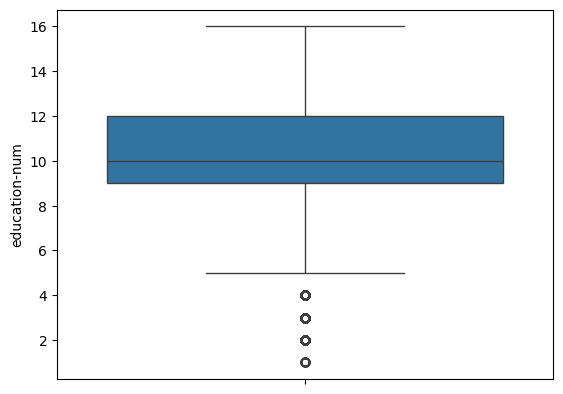

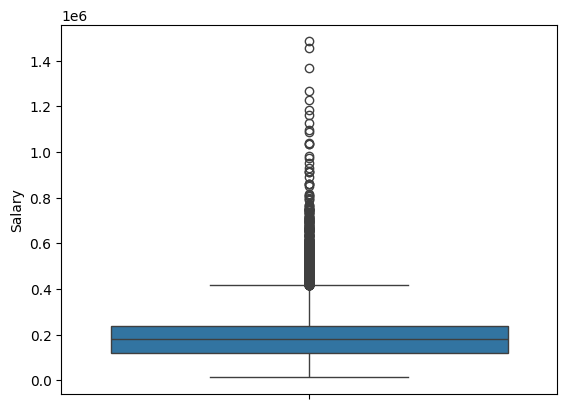

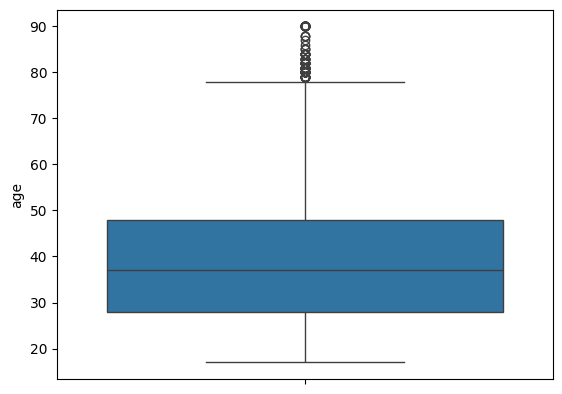

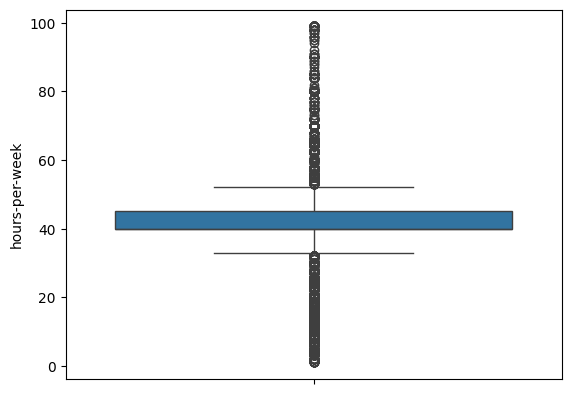

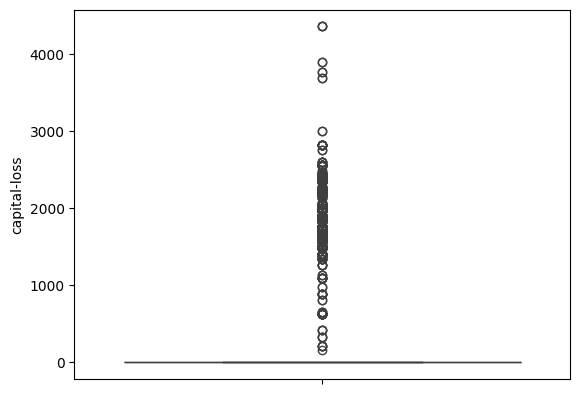

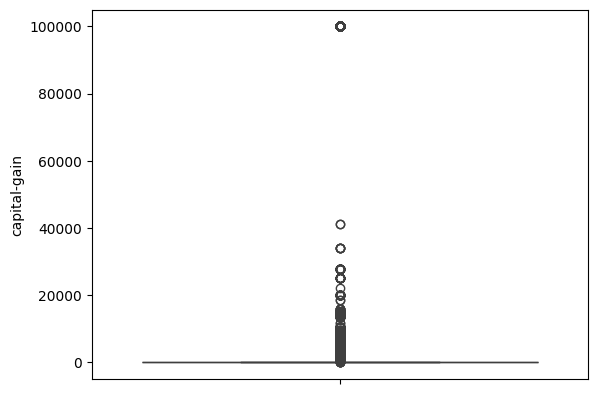

In [8]:
for column in [data['education-num'], data['Salary'],data['age'],data['hours-per-week'],data['capital-loss'],data['capital-gain']]:
    sns.boxplot(data=column)
    plt.show()

                                                     Future Scaling

In [9]:
# Initialize LabelEncoder
label_enc = LabelEncoder()

# Encode categorical columns (assuming these columns are categorical)
data['Workclass'] = label_enc.fit_transform(data['Workclass'])
data['education'] = label_enc.fit_transform(data['education'])
data['marital-status'] = label_enc.fit_transform(data['marital-status'])
data['Occupation'] = label_enc.fit_transform(data['Occupation'])
data['relationship'] = label_enc.fit_transform(data['relationship'])
data['colour'] = label_enc.fit_transform(data['colour'])
data['gender'] = label_enc.fit_transform(data['gender'])
data['Country'] = label_enc.fit_transform(data['Country'])
data['income'] = label_enc.fit_transform(data['income'])


                                                      Check The correlation matrix

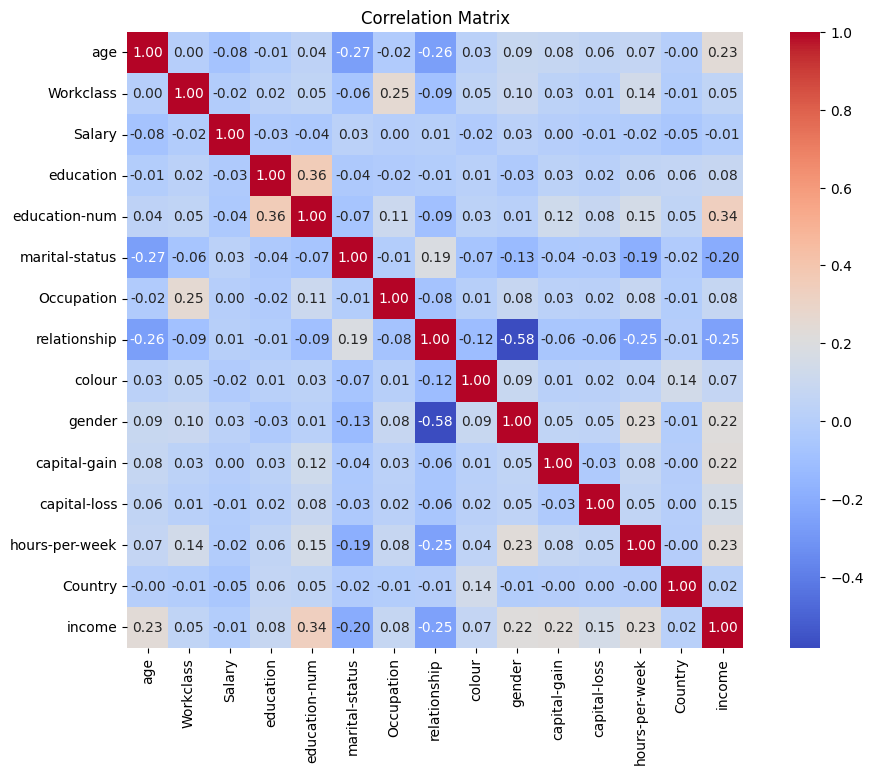

In [10]:
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)

# Show the plot
plt.title("Correlation Matrix")
plt.show()

In [11]:
X = data.drop('income', axis=1)  # Features (independent variables)
y = data['income'] 

                                                      Split The Data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test

,age,Workclass,Salary,education,education-num,marital-status,Occupation,relationship,colour,gender,capital-gain,capital-loss,hours-per-week,Country
14160,27,4,160178,15,10,0,1,1,4,0,0,0,38,39
27048,45,7,50567,11,9,2,4,5,4,0,0,0,40,39
28868,29,4,185908,9,13,2,4,0,2,1,0,0,55,39
5667,30,4,190040,9,13,4,7,1,4,0,0,0,40,39
7827,29,6,189346,15,10,0,3,1,4,1,2202,0,50,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,71,4,269708,9,13,0,13,3,4,0,2329,0,16,39
24534,55,2,253062,15,10,2,10,0,4,1,0,0,40,39
18080,47,4,354148,14,15,2,10,0,4,1,99999,0,48,39
10354,27,4,43652,9,13,4,1,1,4,0,0,0,40,39


                                                      Train The model

In [13]:
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
y_pred = knn.predict(X_test)

                                                Check The Accuracy

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of KNN model: {accuracy:.2f}')

Accuracy of KNN model: 0.78


In [16]:
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      4942
           1       0.57      0.33      0.42      1571

    accuracy                           0.78      6513
   macro avg       0.69      0.62      0.64      6513
weighted avg       0.75      0.78      0.76      6513



                                            Check Confusion matrix

Confusion Matrix:
[[4557  385]
 [1057  514]]


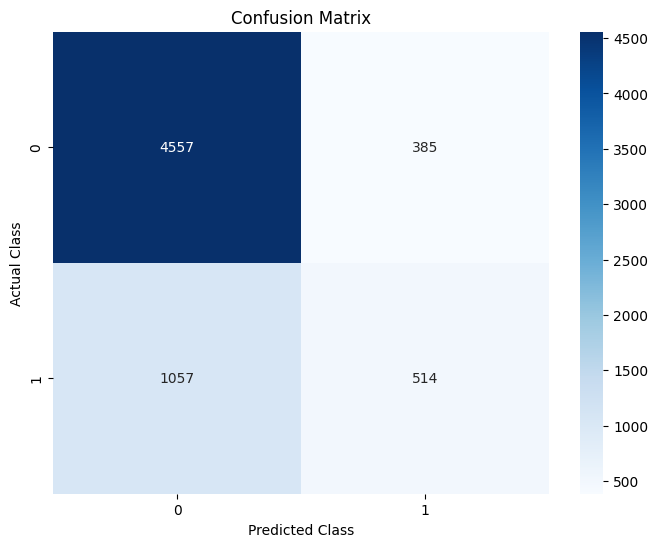

In [17]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
# Visualizing the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()